# 5 EDA - Investigating San Francisco Housing Prices Through Police Incident Reports and 311 Cases<a id='5_EDA_-_Investigating_San_Francisco_Housing_Prices_Through_Police_Incident_Reports_and_311_Cases'></a>

## 5.1 Contents<a id='5.1_Contents'></a>
* [5 EDA - Investigating San Francisco Housing Prices Through Police Incident Reports and 311 Cases](#5_EDA_-_Investigating_San_Francisco_Housing_Prices_Through_Police_Incident_Reports_and_311_Cases)
  * [5.1 Contents](#5.1_Contents)
  * [5.2 Introduction](#5.2_Introduction)
  * [5.3 Imports](#5.3_Imports)
  * [5.4 Load The Data](#5.4_Load_The_Data)
    * [5.4.1 Year Month](#5.4.1_Year_Month)
  * [5.5 Explore The Data](#5.5_Explore_The_Data)
  

## 5.2 Introduction<a id='5.2_Introduction'></a>

In this notebook, we will continue our investigation into the relationship between San Francisco housing prices and police incident reports and 311 cases by performing exploratory data analysis on our combined dataset. We created the file `SF_Combined_SFPD_311_Housing.csv` in our previous Jupyter Notebook, `4 Wrangling - Combining SF Data`. This file contains all SF police incident reports, 311 cases, and housing sales data aggregated by month and by neighborhood, from January 2018 up to and including September 2020, wherein each row is an observation with a distinct pairing on month-year and each column represents a possible feature to be used in modelling.

## 5.3 Imports<a id='5.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
# test?
#pd.plotting.register_matplotlib_converters()

## 5.4 Load The Data<a id='5.4_Load_The_Data'></a>

In [3]:
data = pd.read_csv('data/SF_Combined_SFPD_311_Housing.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 82 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Year Month                                    1353 non-null   int64  
 1   Neighborhood                                  1353 non-null   object 
 2   Arson                                         1353 non-null   int64  
 3   Assault                                       1353 non-null   int64  
 4   Burglary                                      1353 non-null   int64  
 5   Case Closure                                  1353 non-null   int64  
 6   Civil Sidewalks                               1353 non-null   int64  
 7   Courtesy Report                               1353 non-null   int64  
 8   Disorderly Conduct                            1353 non-null   int64  
 9   Drug Offense                                  1353 non-null   i

In [5]:
data.head()

,Year Month,Neighborhood,Arson,Assault,Burglary,Case Closure,Civil Sidewalks,Courtesy Report,Disorderly Conduct,Drug Offense,...,SFHA Requests,Sewer Issues,Sidewalk or Curb,Sign Repair,Street Defects,Street and Sidewalk Cleaning,Streetlights,Temporary Sign Request,Tree Maintenance,Median Sale Price
0,201801,Bayview Hunters Point,5,64,42,1,0,1,27,16,...,16,81,13,5,39,1185,12,0,23,830000.0
1,201801,Bernal Heights,2,22,8,1,0,0,8,0,...,0,44,8,9,20,479,25,0,27,1538500.0
2,201801,Castro/Upper Market,1,19,29,1,3,0,2,5,...,0,26,17,8,13,465,36,0,28,1351000.0
3,201801,Chinatown,1,12,10,1,0,10,2,3,...,2,4,9,20,8,357,9,1,2,1500000.0
4,201801,Excelsior,0,24,12,0,0,0,5,6,...,0,37,3,5,10,536,20,0,9,985000.0


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year Month,1353.0,2.018970e+05,78.786131,201801.0,201809.0,201905.0,202001.0,202009.0
Arson,1353.0,7.368810e-01,1.388437,0.0,0.0,0.0,1.0,10.0
Assault,1353.0,1.696600e+01,25.721547,0.0,3.0,8.0,15.0,138.0
Burglary,1353.0,1.438655e+01,15.374632,0.0,4.0,10.0,19.0,106.0
Case Closure,1353.0,1.203991e+00,2.476472,0.0,0.0,0.0,1.0,26.0
...,...,...,...,...,...,...,...,...
Street and Sidewalk Cleaning,1353.0,5.001523e+02,577.284665,0.0,142.0,392.0,643.0,4605.0
Streetlights,1353.0,9.090170e+00,10.128063,0.0,2.0,6.0,12.0,67.0
Temporary Sign Request,1353.0,4.083518e+00,8.192017,0.0,0.0,1.0,5.0,85.0
Tree Maintenance,1353.0,2.158093e+01,20.148476,0.0,8.0,18.0,29.0,193.0


### 5.4.1 Year Month<a id='#5.4.1_Year_Month'></a>

Note that the column `Year Month` is currently of type `int64`. `matplotlib` has trouble plotting period data, and so instead, we will use a bit of a hack: every distinct `Year Month` will have an associated and ordered numeric representation in column `Period`. That is, January 2018 will be represented by the number 1, February 2018 by the number 2, and so on. Then, when plotting, we will utilize the numeric column data but display the `Year Month` data in the axis labels.

We'll also convert `Year Month` to type `str`.

In [7]:
data['Year Month'].dtype

dtype('int64')

In [8]:
# convert it to type string, then datetime, then to type Period
#data['Year Month'] = pd.to_datetime( data['Year Month'].astype(str), format='%Y%m').dt.to_period("M")
data['Year Month'] = data['Year Month'].astype(str)

In [9]:
# create mapping from 'Year Month' to 'Period'
periodKeys = np.sort(data['Year Month'].unique()).tolist()
periodMapper = dict(zip(periodKeys,np.arange(1,len(periodKeys)+1,1)))
periodMapper

{'201801': 1,
 '201802': 2,
 '201803': 3,
 '201804': 4,
 '201805': 5,
 '201806': 6,
 '201807': 7,
 '201808': 8,
 '201809': 9,
 '201810': 10,
 '201811': 11,
 '201812': 12,
 '201901': 13,
 '201902': 14,
 '201903': 15,
 '201904': 16,
 '201905': 17,
 '201906': 18,
 '201907': 19,
 '201908': 20,
 '201909': 21,
 '201910': 22,
 '201911': 23,
 '201912': 24,
 '202001': 25,
 '202002': 26,
 '202003': 27,
 '202004': 28,
 '202005': 29,
 '202006': 30,
 '202007': 31,
 '202008': 32,
 '202009': 33}

In [10]:
data['Period'] = data['Year Month'].apply(lambda x: periodMapper[x])

In [11]:
data[['Year Month','Period']].head()

,Year Month,Period
0,201801,1
1,201801,1
2,201801,1
3,201801,1
4,201801,1


## 5.5 Explore The Data<a id='5.5_Explore_The_Data'></a>

### 5.5.1 Housing Price Trends by Neighborhood<a id='5.5.1_Housing_Price_Trends_by_Neighborhood'></a>

Since we have time series data, let's visualize the housing prices to see if there are any pricing trends occuring in each neighborhood.

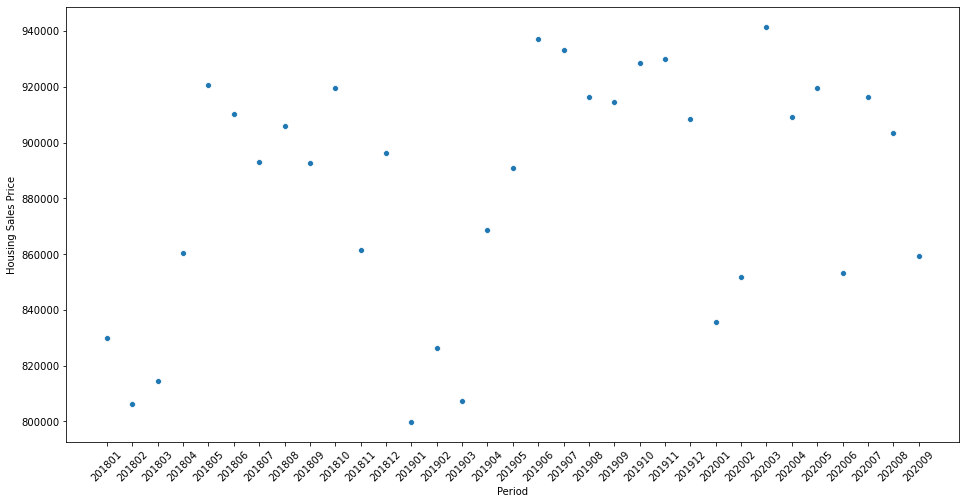

In [28]:
# let's look at one neighborhood first
f, ax = plt.subplots(figsize=(16,8))
data_bayview = data[data['Neighborhood'] == 'Bayview Hunters Point']
g = sns.scatterplot(data=data_bayview, x='Period', y='Median Sale Price')
_ = g.set_xticks(data_bayview['Period'])
_ = g.set_xticklabels(data_bayview['Year Month'], rotation=45)
_ = g.set_ylabel('Housing Sales Price')

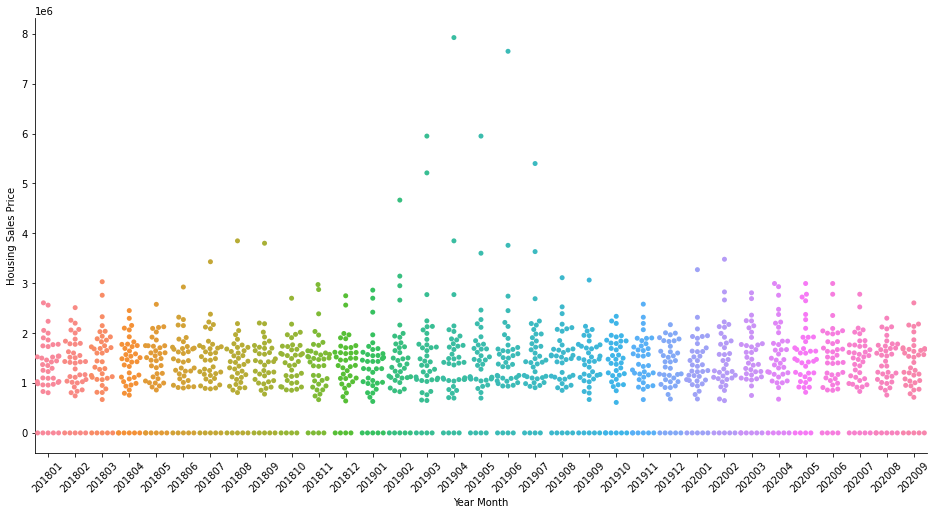

In [40]:
# look at all neighborhoods
f, ax = plt.subplots(figsize=(16,8))
g = sns.swarmplot(data=data, x='Year Month', y='Median Sale Price')
sns.despine()
_ = plt.ylabel('Housing Sales Price')
_ = plt.xticks(rotation=45)

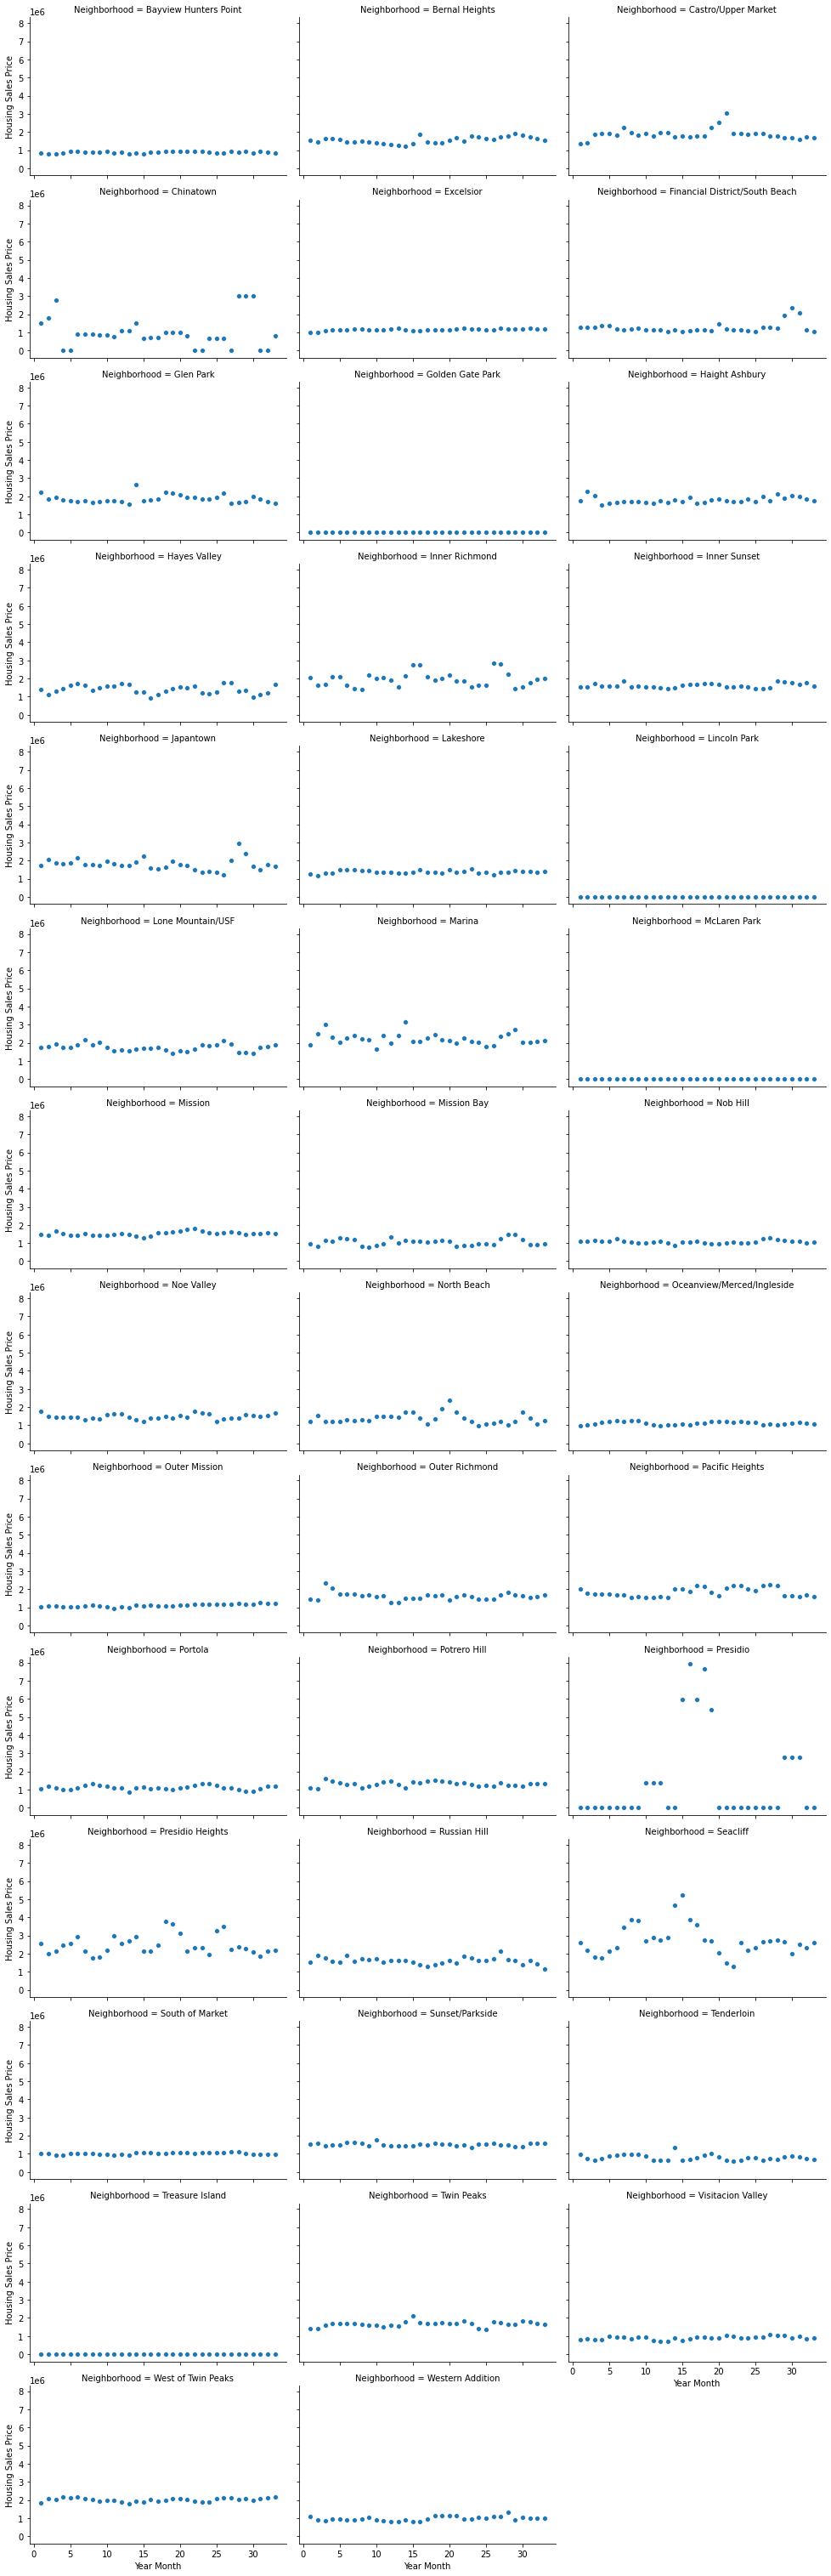

In [33]:
# look at all neighborhoods separately
g = sns.FacetGrid(data, col='Neighborhood', col_wrap=3, aspect=1.5)
_ = g.map_dataframe(sns.scatterplot, x='Period', y='Median Sale Price')
_ = g.set_axis_labels('Year Month', 'Housing Sales Price')